In [1]:
cd ..

/home/jovyan/Ames_Housing_Project


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

from IPython.display import display
%matplotlib inline

In [3]:
zoning_df = pd.read_csv('data/zoning.csv')
listing_df = pd.read_csv('data/listing.csv')
sale_df = pd.read_csv('data/sale.csv')

In [4]:
housing_df = pd.merge(zoning_df, listing_df, left_on="Id", right_on="Id")
housing_df = pd.merge(housing_df, sale_df, left_on="Id", right_on="Id")

In [5]:
housing_df.set_index("Id", inplace=True)

## General data cleaning
Ensuring numeric/categorical variables properly coded; replacing null values

In [6]:
housing_df.ftypes

MSSubClass         int64:dense
MSZoning          object:dense
LotFrontage      float64:dense
LotArea            int64:dense
LotShape          object:dense
LandContour       object:dense
Utilities         object:dense
LotConfig         object:dense
LandSlope         object:dense
Neighborhood      object:dense
Condition1        object:dense
Condition2        object:dense
BldgType          object:dense
HouseStyle        object:dense
Street            object:dense
Alley             object:dense
OverallQual        int64:dense
OverallCond        int64:dense
YearBuilt          int64:dense
YearRemodAdd       int64:dense
RoofStyle         object:dense
RoofMatl          object:dense
Exterior1st       object:dense
Exterior2nd       object:dense
MasVnrType        object:dense
MasVnrArea       float64:dense
ExterQual         object:dense
ExterCond         object:dense
Foundation        object:dense
BsmtQual          object:dense
                     ...      
BedroomAbvGr       int64:dense
KitchenA

In [7]:
for column in housing_df.select_dtypes(['object']).columns:
    housing_df[column] = housing_df[column].astype('category')

In [8]:
housing_df.ftypes

MSSubClass          int64:dense
MSZoning         category:dense
LotFrontage       float64:dense
LotArea             int64:dense
LotShape         category:dense
LandContour      category:dense
Utilities        category:dense
LotConfig        category:dense
LandSlope        category:dense
Neighborhood     category:dense
Condition1       category:dense
Condition2       category:dense
BldgType         category:dense
HouseStyle       category:dense
Street           category:dense
Alley            category:dense
OverallQual         int64:dense
OverallCond         int64:dense
YearBuilt           int64:dense
YearRemodAdd        int64:dense
RoofStyle        category:dense
RoofMatl         category:dense
Exterior1st      category:dense
Exterior2nd      category:dense
MasVnrType       category:dense
MasVnrArea        float64:dense
ExterQual        category:dense
ExterCond        category:dense
Foundation       category:dense
BsmtQual         category:dense
                      ...      
BedroomA

In [9]:
housing_df.MSSubClass = housing_df.MSSubClass.astype('category')
housing_df.OverallQual = housing_df.OverallQual.astype('category')
housing_df.OverallCond = housing_df.OverallCond.astype('category')
housing_df.BsmtFullBath = housing_df.BsmtFullBath.astype('category')
housing_df.BsmtHalfBath = housing_df.BsmtHalfBath.astype('category')
housing_df.FullBath = housing_df.FullBath.astype('category')
housing_df.HalfBath = housing_df.HalfBath.astype('category')
housing_df.BedroomAbvGr = housing_df.BedroomAbvGr.astype('category')
housing_df.KitchenAbvGr = housing_df.KitchenAbvGr.astype('category')
housing_df.TotRmsAbvGrd = housing_df.TotRmsAbvGrd.astype('category')
housing_df.Fireplaces = housing_df.Fireplaces.astype('category')
housing_df.GarageCars = housing_df.GarageCars.astype('category')
housing_df.MoSold = housing_df.MoSold.astype('category')

In [10]:
housing_df.LotFrontage.fillna(housing_df.LotFrontage.mean(), inplace=True)
housing_df.MasVnrArea.fillna(housing_df.MasVnrArea.mean(), inplace=True)
housing_df.GarageYrBlt.fillna(housing_df.GarageYrBlt.mean(), inplace=True)

In [11]:
empty_means_without = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                        "BsmtFinType2", "FireplaceQu","GarageType","GarageFinish",
                        "GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

def replace_empty(feature, value):
    housing_df[feature].cat.add_categories([value], inplace=True)
    housing_df[feature].fillna(value, inplace=True)


for feature in empty_means_without:
    replace_empty(feature, "None")

housing_df.dropna(inplace=True)

In [12]:
numeric_df = housing_df.select_dtypes(exclude=['category']).copy()
numeric_df.drop("SalePrice", axis=1, inplace=True)

## Scaling the numeric features and visualizing the transformation

In [13]:
# One method for scaling, though did not use, since wanted to use Gelman
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import scipy.stats as st

In [14]:
numeric_sc_df = (numeric_df - numeric_df.mean())/numeric_df.std()
numeric_log_df = np.log(numeric_df + 1)
numeric_log_sc_df = (numeric_log_df - numeric_log_df.mean())/(2*numeric_log_df.std())
# Gelman Scaled

In [15]:
for col in numeric_log_df.columns:
    original_col_skewtest = st.skewtest(numeric_df[col])
    scaled_col_skewtest = st.skewtest(numeric_sc_df[col])
    original_log_col_skewtest = st.skewtest(numeric_log_df[col])
    scaled_log_col_skewtest = st.skewtest(numeric_log_sc_df[col])
    print("""{}
    orig:       {} 
    scaled:     {}
    orig log:   {}
    scaled log: {}
    
    """.format(col, 
               original_col_skewtest,
               scaled_col_skewtest, 
               original_log_col_skewtest,
               scaled_log_col_skewtest))

LotFrontage
    orig:       SkewtestResult(statistic=23.007781067264801, pvalue=3.8960257723151785e-117) 
    scaled:     SkewtestResult(statistic=23.007781067264794, pvalue=3.8960257723158442e-117)
    orig log:   SkewtestResult(statistic=-12.06333541433662, pvalue=1.6496412728124408e-33)
    scaled log: SkewtestResult(statistic=-12.063335414336686, pvalue=1.6496412728111199e-33)
    
    
LotArea
    orig:       SkewtestResult(statistic=43.632379340590063, pvalue=0.0) 
    scaled:     SkewtestResult(statistic=43.632379340590063, pvalue=0.0)
    orig log:   SkewtestResult(statistic=-2.2133247808919201, pvalue=0.026875262339499523)
    scaled log: SkewtestResult(statistic=-2.2133247808919743, pvalue=0.0268752623394958)
    
    
YearBuilt
    orig:       SkewtestResult(statistic=-8.7951479176227565, pvalue=1.4285966002155946e-18) 
    scaled:     SkewtestResult(statistic=-8.7951479176228151, pvalue=1.4285966002148439e-18)
    orig log:   SkewtestResult(statistic=-9.1407657171266852, pv

In [16]:
numeric_for_show = numeric_df[['LotArea','GarageArea','GrLivArea']]
log_sc_for_show = numeric_log_sc_df[['LotArea','GarageArea','GrLivArea']]

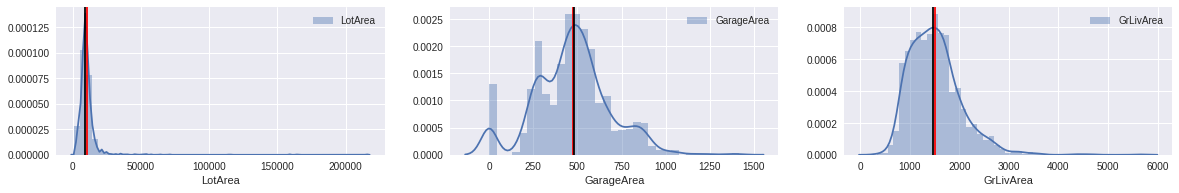

In [17]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(numeric_for_show.columns):
    fig.add_subplot(231+i)
    sns.distplot(numeric_for_show[col], label=col)
    plt.axvline(numeric_for_show[col].mean(), c='red')
    plt.axvline(numeric_for_show[col].median(), c='black')
    plt.legend()

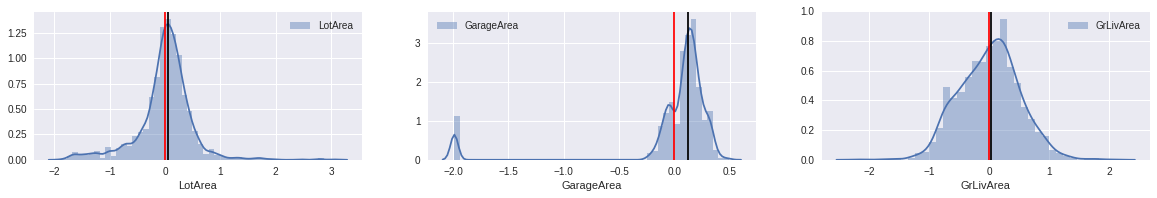

In [18]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(log_sc_for_show.columns):
    fig.add_subplot(231+i)
    sns.distplot(log_sc_for_show[col], label=col)
    plt.axvline(log_sc_for_show[col].mean(), c='red')
    plt.axvline(log_sc_for_show[col].median(), c='black')
    plt.legend()

## One-hot encoding Categorical Features
And adding the features to the log-scaled numeric dataframe

In [19]:
housing_df = pd.get_dummies(housing_df)

In [20]:
housing_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,1,0,0,0,0,1,0


In [21]:
for col in numeric_log_sc_df.columns:
    housing_df[col] = numeric_log_sc_df[col]

In [22]:
housing_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.043080,-0.065830,0.525494,0.441038,0.598461,0.390174,-0.17823,-0.168977,0.001975,-0.401354,...,0,0,0,1,0,0,0,0,1,0
2,0.282123,0.057485,0.084614,-0.209405,-0.405349,0.444600,-0.17823,0.001909,0.170817,0.210649,...,0,0,0,1,0,0,0,0,1,0
3,0.027507,0.210770,0.493040,0.417104,0.562464,0.327844,-0.17823,0.115667,0.033331,-0.287695,...,0,0,0,1,0,0,0,0,1,0
4,-0.168179,0.052438,-0.934033,-0.355154,-0.405349,0.192679,-0.17823,0.174333,-0.052045,-0.218961,...,0,0,0,1,1,0,0,0,0,0
5,0.358665,0.439912,0.476802,0.369201,0.708201,0.377655,-0.17823,0.148245,0.128493,0.057237,...,0,0,0,1,0,0,0,0,1,0


In [30]:
outliers = [198, 524, 1174, 1183, 1299, 186, 692, 770, 
            179, 225, 804, 889, 1387, 497]
housing_outliers_removed_df = housing_df.drop(outliers, axis=0)
housing_outliers_removed_df.to_pickle('final_one_hot_sc.p')